1. Theoretical Framework: Contextual Sensitivity in PHMThis notebook presents a comparative analysis between a traditional Context-Blind Stochastic Model and the IPMQ-Sim Framework. While standard models utilize a Brownian-motion-like degradation with a constant drift, the IPMQ Framework integrates operational load as a primary driver of fatigue. This experiment evaluates the model's ability to react to a sudden $+40\%$ increase in operational stress.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IEEE Publication Standards for Visualization
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 11,
    "axes.grid": True,
    "grid.linestyle": ":",
    "grid.alpha": 0.6,
    "figure.figsize": (8, 5),
    "savefig.dpi": 300
})

# Fixed seed for experimental consistency
np.random.seed(42)

2. Definition of Competing Degradation HypothesesTwo distinct mathematical approaches are modeled here:Baseline (Stochastic without context): $H_t = H_{t-1} - \mu + \epsilon$, where $\mu$ is a constant drift regardless of external conditions.Proposed (IPMQ-Sim): $H_t = H_{t-1} - f(L_t, t) + \epsilon$, where the degradation rate is an exponential function of the instantaneous load $L_t$.

In [2]:
def execute_sensitivity_benchmark():
    """
    Executes a comparative simulation to evaluate reaction to 
    operational regime shifts.
    """
    cycles = 300
    regime_shift_point = 100  # Point where operational load increases
    
    # Model 1: Context-Blind Stochastic Baseline
    # Assumes a constant mean degradation rate
    simple_health_trajectory = [1.0]
    fixed_drift = 0.0035 
    
    # Model 2: IPMQ-Sim Framework (Context-Aware)
    # Sensitivity calibrated via exponential wear coefficients
    ipmq_health_trajectory = [1.0]
    base_wear_coeff = 0.0005
    
    for t in range(1, cycles):
        # Operational Scenario: Sudden stress increase after cycle 100
        current_load = 1.0 if t < regime_shift_point else 1.4
        
        # A. Evolution of Context-Blind Model
        # The drift remains constant despite the 40% load increase
        h_simple = simple_health_trajectory[-1] - fixed_drift + np.random.normal(0, 0.001)
        simple_health_trajectory.append(max(0, h_simple))
        
        # B. Evolution of IPMQ-Sim
        # Accelerated degradation triggered by load-dependent fatigue physics
        dynamic_rate = base_wear_coeff * np.exp(current_load * 1.5)
        h_ipmq = ipmq_health_trajectory[-1] - dynamic_rate + np.random.normal(0, 0.001)
        ipmq_health_trajectory.append(max(0, h_ipmq))
        
    return simple_health_trajectory, ipmq_health_trajectory, regime_shift_point

3. Quantitative Analysis and Divergence Visualization
The following analysis highlights the Prognostic Error that occurs when context is ignored. In a real industrial environment, the context-blind model would lead to a "Late Prediction" (Hazardous Zone), while the IPMQ Framework correctly identifies the accelerated end-of-life (EoL).

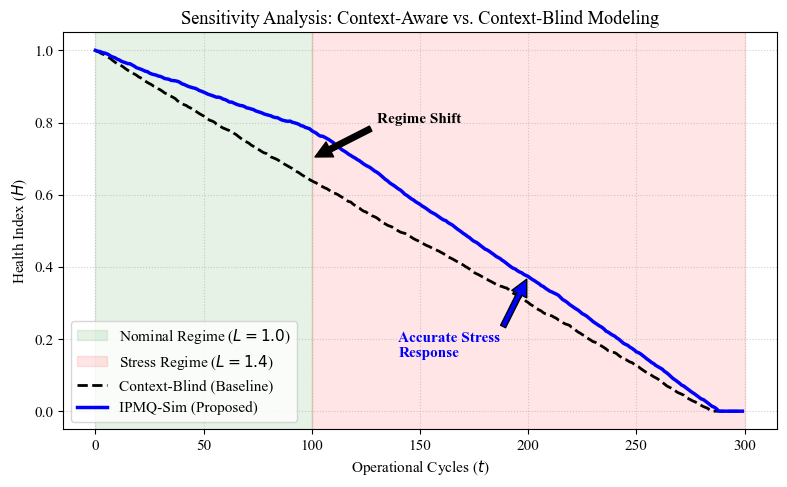

In [3]:
# Run benchmark
simple_data, ipmq_data, shift_point = execute_sensitivity_benchmark()

plt.figure()

# Delineation of Operational Regimes
plt.axvspan(0, shift_point, color='green', alpha=0.1, label='Nominal Regime ($L=1.0$)')
plt.axvspan(shift_point, 300, color='red', alpha=0.1, label='Stress Regime ($L=1.4$)')

# Trajectory Visualization
plt.plot(simple_data, 'k--', linewidth=2, label='Context-Blind (Baseline)')
plt.plot(ipmq_data, 'b-', linewidth=2.5, label='IPMQ-Sim (Proposed)')

# Academic Annotations
plt.annotate('Regime Shift', xy=(shift_point, 0.7), xytext=(shift_point+30, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05), weight='bold')

plt.annotate('Accurate Stress\nResponse', xy=(200, ipmq_data[200]), 
             xytext=(140, 0.15), arrowprops=dict(facecolor='blue', shrink=0.05), 
             color='blue', weight='bold')

plt.title('Sensitivity Analysis: Context-Aware vs. Context-Blind Modeling')
plt.xlabel('Operational Cycles ($t$)')
plt.ylabel('Health Index ($H$)')
plt.legend(loc='lower left', frameon=True)
plt.tight_layout()

# Export for LaTeX Manuscript
plt.savefig('context_sensitivity_comparison.png', dpi=300)
plt.show()